In [8]:
import numpy as np
from scipy.fft import fft2, ifft2, fftshift
from scipy.ndimage import zoom
import matplotlib.pyplot as plt

### Create a synthetic grayscale image (512x512 checkerboard pattern)

In [3]:
rows, cols = 512, 512
img = np.zeros((rows, cols))
tile_size = 32
for i in range(0, rows, tile_size * 2):
    for j in range(0, cols, tile_size * 2):
        img[i:i+tile_size, j:j+tile_size] = 255
        img[i+tile_size:i+tile_size*2, j+tile_size:j+tile_size*2] = 255
img = img.astype(float)
print(f"original image shape: {img.shape}")

original image shape: (512, 512)


### Spectral analysis

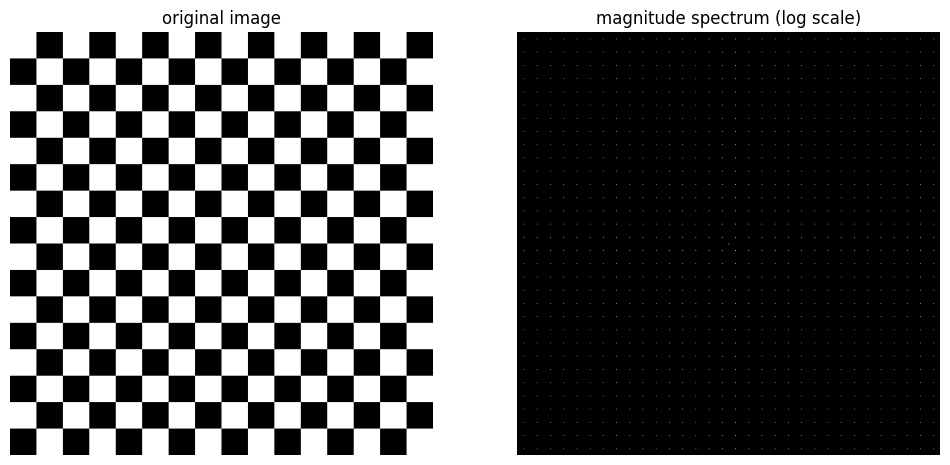

In [5]:
f = fft2(img)
fshift = fftshift(f)
magnitude_spectrum = np.log(np.abs(fshift) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('original image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('magnitude spectrum (log scale)')
plt.axis('off')
plt.show()

### Resize to half size (256x256)

Subsampled image shape: (256, 256)
fourier resized (half) image shape: (256, 256)


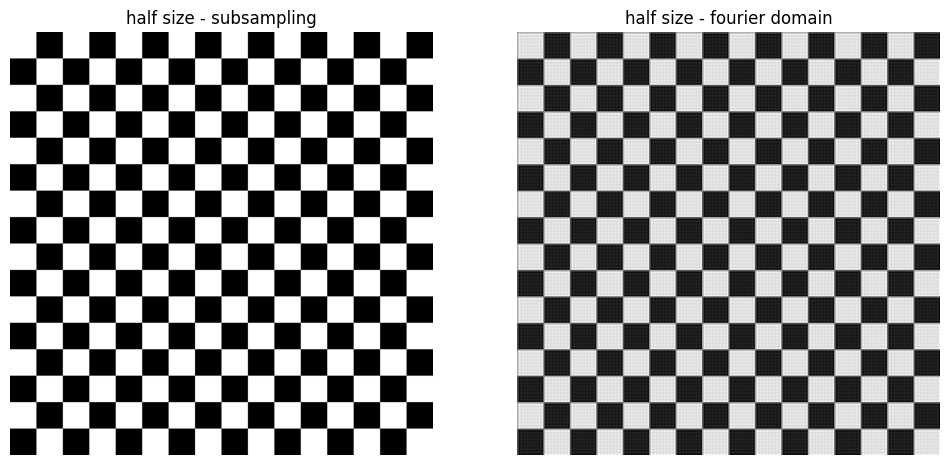

In [6]:
# in space domain by subsampling
small_sub = img[::2, ::2]
print(f"Subsampled image shape: {small_sub.shape}")

# in the fourier domain
half_rows, half_cols = rows // 2, cols // 2
crop_start_row = (rows - half_rows) // 2
crop_start_col = (cols - half_cols) // 2
cropped_fshift = fshift[crop_start_row:crop_start_row + half_rows,
                        crop_start_col:crop_start_col + half_cols]
cropped_f = fftshift(cropped_fshift)
small_fourier = np.real(ifft2(cropped_f))  # Take real part to avoid tiny imaginary components
print(f"fourier resized (half) image shape: {small_fourier.shape}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(small_sub, cmap='gray')
plt.title('half size - subsampling')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(small_fourier, cmap='gray')
plt.title('half size - fourier domain')
plt.axis('off')
plt.show()

### Resize to double size (1024x1024)

sinc interpolated image shape: (1024, 1024)
linear interpolated image shape: (1024, 1024)


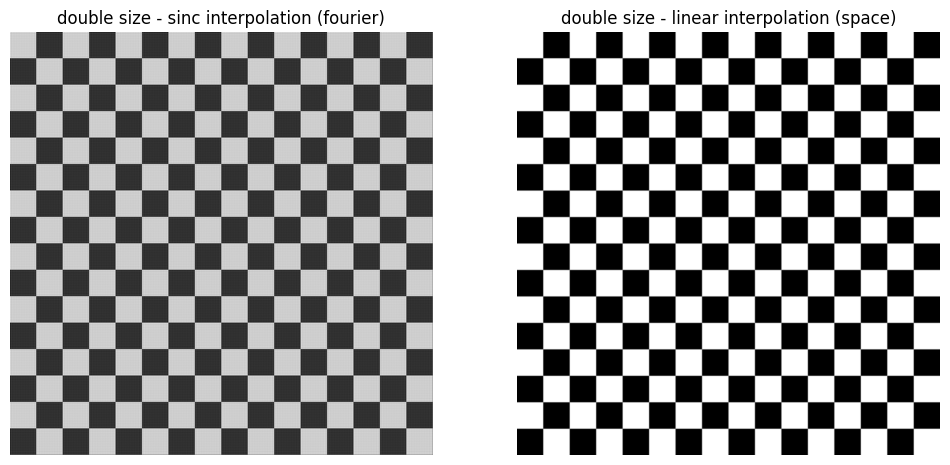

In [9]:
# sinc interpolation
double_rows, double_cols = rows * 2, cols * 2
padded_fshift = np.pad(fshift, ((rows // 2, rows // 2), (cols // 2, cols // 2)), mode='constant')
padded_f = fftshift(padded_fshift)
large_sinc = np.real(ifft2(padded_f))
print(f"sinc interpolated image shape: {large_sinc.shape}")

# linear interpolation
large_linear = zoom(img, 2, order=1)  # order=1 for linear interpolation
print(f"linear interpolated image shape: {large_linear.shape}")

# Display double-sized images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(large_sinc, cmap='gray')
plt.title('double size - sinc interpolation (fourier)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(large_linear, cmap='gray')
plt.title('double size - linear interpolation (space)')
plt.axis('off')
plt.show()